In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as linalg
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("adult.data", header=None, delimiter=r",\s+", engine='python')
data.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
]
data.head(10)

Age         WorkClass  fnlwgt  Education  EducationNum  \
0   39         State-gov   77516  Bachelors            13   
1   50  Self-emp-not-inc   83311  Bachelors            13   
2   38           Private  215646    HS-grad             9   
3   53           Private  234721       11th             7   
4   28           Private  338409  Bachelors            13   
5   37           Private  284582    Masters            14   
6   49           Private  160187        9th             5   
7   52  Self-emp-not-inc  209642    HS-grad             9   
8   31           Private   45781    Masters            14   
9   42           Private  159449  Bachelors            13   

           MaritalStatus         Occupation   Relationship   Race  Gender  \
0          Never-married       Adm-clerical  Not-in-family  White    Male   
1     Married-civ-spouse    Exec-managerial        Husband  White    Male   
2               Divorced  Handlers-cleaners  Not-in-family  White    Male   
3     Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4     Married-civ-spouse     Prof-specialty           Wife  Black  Female   
5     Married-civ-spouse    Exec-managerial           Wife  White  Female   
6  Married-spouse-absent      Other-service  Not-in-family  Black  Female   
7     Married-civ-spouse    Exec-managerial        Husband  White    Male   
8          Never-married     Prof-specialty  Not-in-family  White  Female   
9     Married-civ-spouse    Exec-managerial        Husband  White    Male   

   CapitalGain  CapitalLoss  HoursPerWeek  NativeCountry Income  
0         2174            0            40  United-States  <=50K  
1            0            0            13  United-States  <=50K  
2            0            0            40  United-States  <=50K  
3            0            0            40  United-States  <=50K  
4            0            0            40           Cuba  <=50K  
5            0            0            40  United-States  <=50K  
6            0            0            16        Jamaica  <=50K  
7            0            0            45  United-States   >50K  
8        14084            0            50  United-States   >50K  
9         5178            0            40  United-States   >50K

In [7]:
test = pd.read_csv("./data/adult.test", header=None, delimiter=r",\s+", engine='python')
test.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
]
test.head(10)

Age         WorkClass  fnlwgt     Education  EducationNum  \
0   25           Private  226802          11th             7   
1   38           Private   89814       HS-grad             9   
2   28         Local-gov  336951    Assoc-acdm            12   
3   44           Private  160323  Some-college            10   
4   18                 ?  103497  Some-college            10   
5   34           Private  198693          10th             6   
6   29                 ?  227026       HS-grad             9   
7   63  Self-emp-not-inc  104626   Prof-school            15   
8   24           Private  369667  Some-college            10   
9   55           Private  104996       7th-8th             4   

        MaritalStatus         Occupation   Relationship   Race  Gender  \
0       Never-married  Machine-op-inspct      Own-child  Black    Male   
1  Married-civ-spouse    Farming-fishing        Husband  White    Male   
2  Married-civ-spouse    Protective-serv        Husband  White    Male   
3  Married-civ-spouse  Machine-op-inspct        Husband  Black    Male   
4       Never-married                  ?      Own-child  White  Female   
5       Never-married      Other-service  Not-in-family  White    Male   
6       Never-married                  ?      Unmarried  Black    Male   
7  Married-civ-spouse     Prof-specialty        Husband  White    Male   
8       Never-married      Other-service      Unmarried  White  Female   
9  Married-civ-spouse       Craft-repair        Husband  White    Male   

   CapitalGain  CapitalLoss  HoursPerWeek  NativeCountry  Income  
0            0            0            40  United-States  <=50K.  
1            0            0            50  United-States  <=50K.  
2            0            0            40  United-States   >50K.  
3         7688            0            40  United-States   >50K.  
4            0            0            30  United-States  <=50K.  
5            0            0            30  United-States  <=50K.  
6            0            0            40  United-States  <=50K.  
7         3103            0            32  United-States   >50K.  
8            0            0            40  United-States  <=50K.  
9            0            0            10  United-States  <=50K.

In [5]:
data.EducationNum.value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: EducationNum, dtype: int64

In [4]:
data.info() # 没有nan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            32561 non-null  int64 
 1   WorkClass      32561 non-null  object
 2   fnlwgt         32561 non-null  int64 
 3   Education      32561 non-null  object
 4   EducationNum   32561 non-null  int64 
 5   MaritalStatus  32561 non-null  object
 6   Occupation     32561 non-null  object
 7   Relationship   32561 non-null  object
 8   Race           32561 non-null  object
 9   Gender         32561 non-null  object
 10  CapitalGain    32561 non-null  int64 
 11  CapitalLoss    32561 non-null  int64 
 12  HoursPerWeek   32561 non-null  int64 
 13  NativeCountry  32561 non-null  object
 14  Income         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.describe()

Age        fnlwgt  EducationNum   CapitalGain   CapitalLoss  \
count  32561.000000  3.256100e+04  32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05     10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05      2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04      1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05      9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05     10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05     12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06     16.000000  99999.000000   4356.000000   

       HoursPerWeek  
count  32561.000000  
mean      40.437456  
std       12.347429  
min        1.000000  
25%       40.000000  
50%       40.000000  
75%       45.000000  
max       99.000000

In [6]:
pd.crosstab(data['EducationNum'],data['Education'])

Education     10th  11th  12th  1st-4th  5th-6th  7th-8th  9th  Assoc-acdm  \
EducationNum                                                                 
1                0     0     0        0        0        0    0           0   
2                0     0     0      168        0        0    0           0   
3                0     0     0        0      333        0    0           0   
4                0     0     0        0        0      646    0           0   
5                0     0     0        0        0        0  514           0   
6              933     0     0        0        0        0    0           0   
7                0  1175     0        0        0        0    0           0   
8                0     0   433        0        0        0    0           0   
9                0     0     0        0        0        0    0           0   
10               0     0     0        0        0        0    0           0   
11               0     0     0        0        0        0    0           0   
12               0     0     0        0        0        0    0        1067   
13               0     0     0        0        0        0    0           0   
14               0     0     0        0        0        0    0           0   
15               0     0     0        0        0        0    0           0   
16               0     0     0        0        0        0    0           0   

Education     Assoc-voc  Bachelors  Doctorate  HS-grad  Masters  Preschool  \
EducationNum                                                                 
1                     0          0          0        0        0         51   
2                     0          0          0        0        0          0   
3                     0          0          0        0        0          0   
4                     0          0          0        0        0          0   
5                     0          0          0        0        0          0   
6                     0          0          0        0        0          0   
7                     0          0          0        0        0          0   
8                     0          0          0        0        0          0   
9                     0          0          0    10501        0          0   
10                    0          0          0        0        0          0   
11                 1382          0          0        0        0          0   
12                    0          0          0        0        0          0   
13                    0       5355          0        0        0          0   
14                    0          0          0        0     1723          0   
15                    0          0          0        0        0          0   
16                    0          0        413        0        0          0   

Education     Prof-school  Some-college  
EducationNum                             
1                       0             0  
2                       0             0  
3                       0             0  
4                       0             0  
5                       0             0  
6                       0             0  
7                       0             0  
8                       0             0  
9                       0             0  
10                      0          7291  
11                      0             0  
12                      0             0  
13                      0             0  
14                      0             0  
15                    576             0  
16                      0             0

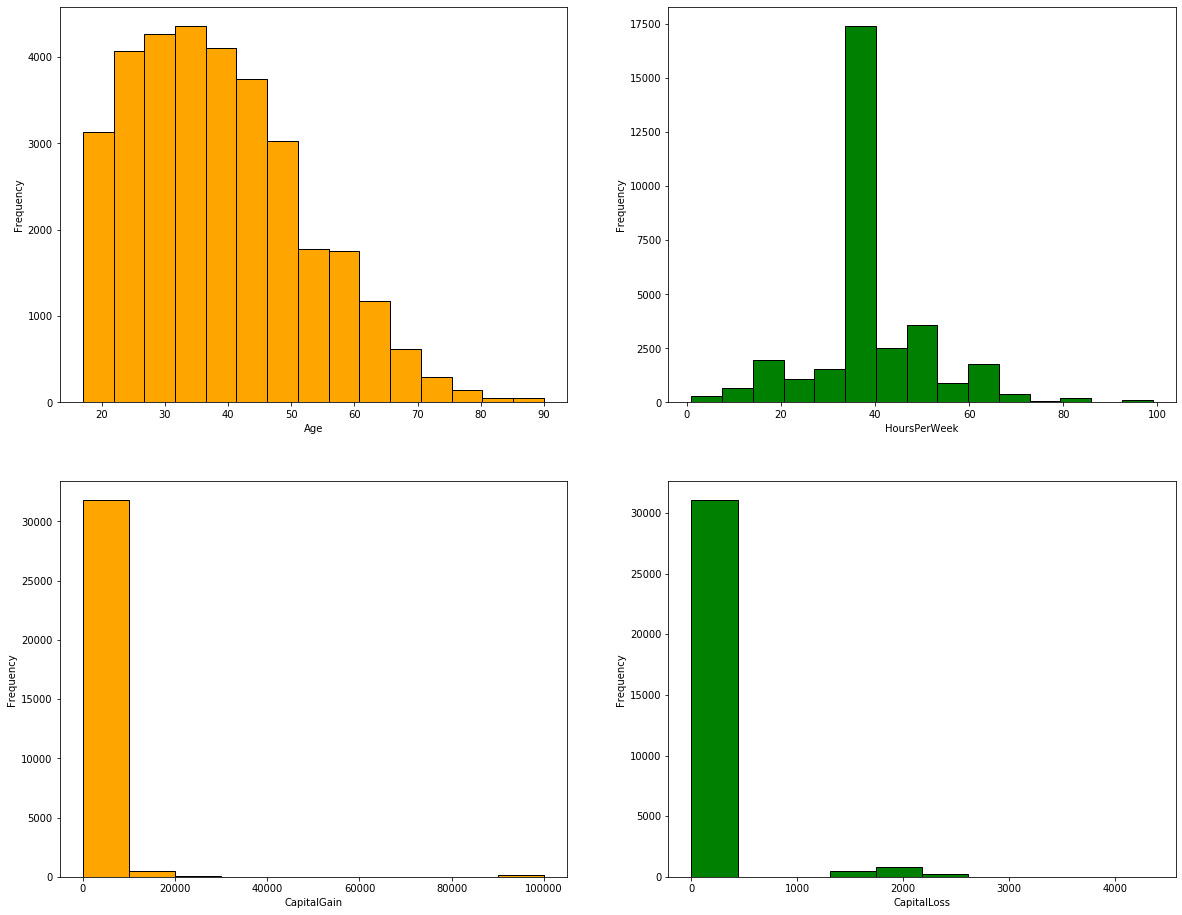

In [7]:
fig = plt.figure(figsize=(20, 16))

ax = fig.add_subplot(221)
plt.hist(data['Age'], bins=15, facecolor="orange", edgecolor="black")
plt.xlabel('Age')
plt.ylabel('Frequency')

ax = fig.add_subplot(222)
plt.hist(data['HoursPerWeek'], bins=15, facecolor="green", edgecolor="black")
plt.xlabel('HoursPerWeek')
plt.ylabel('Frequency')

ax = fig.add_subplot(223)
plt.hist(data['CapitalGain'], bins=10, facecolor="orange", edgecolor="black")
plt.xlabel('CapitalGain')
plt.ylabel('Frequency')

ax = fig.add_subplot(224)
plt.hist(data['CapitalLoss'], bins=10, facecolor="green", edgecolor="black")
plt.xlabel('CapitalLoss')
plt.ylabel('Frequency')

plt.show()

# 替换异常值 (remplacer les valeurs `?`)

### `NativeCountry`

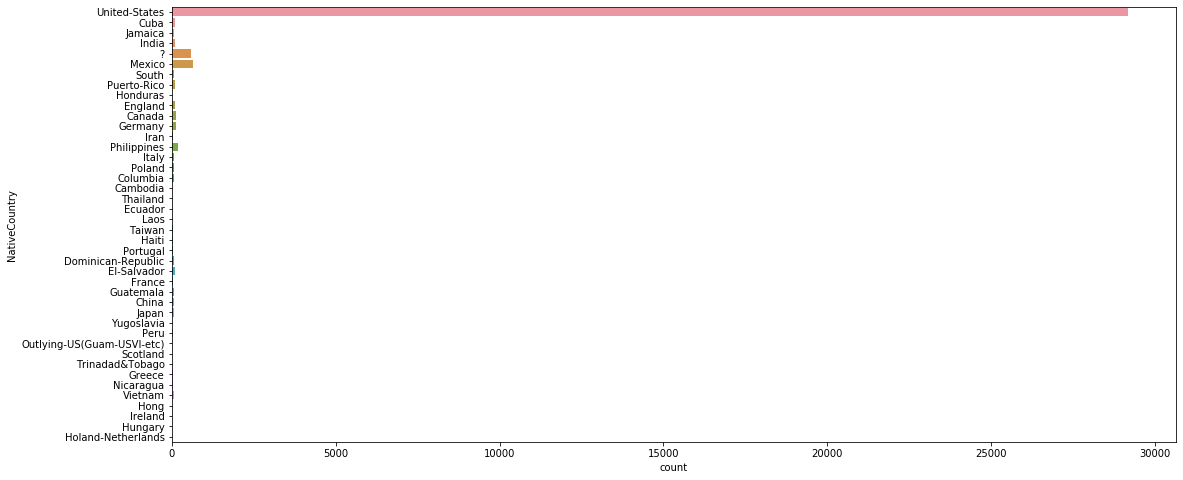

In [8]:
plt.figure(figsize=(18,8))
sns.countplot(y="NativeCountry", data=data)
plt.show()

In [9]:
sns.color_palette("hls", 8)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

In [10]:
# As 91.5% of them have native country America and others are immigrants.
# Donc on choisit mode pour remplacer les valeurs ?
var = data['NativeCountry'].mode()
data['NativeCountry'] = data['NativeCountry'].replace('?',var[0])

### `WorkClass`

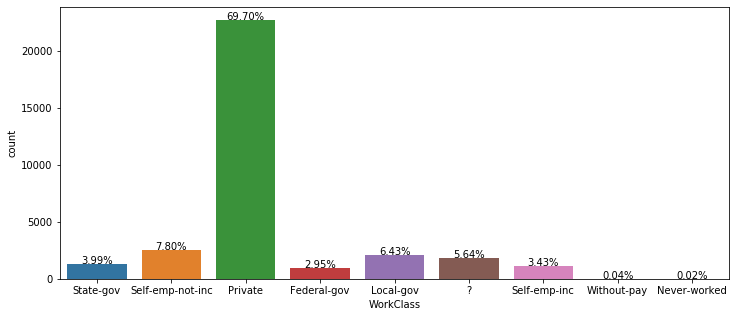

In [11]:
plt.figure(figsize=(12,5))

total = float(len(data["WorkClass"]))

ax = sns.countplot(x="WorkClass", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center") 
plt.show()

In [11]:
# a mon avis on peut effectuer la valeur '?' comme 'private'
# de plus, 'Self-emp-not-inc', 'Without-pay', 'Never-worked' indique que cette personne est sans revenus, on les fusionne
data['WorkClass'] = data['WorkClass'].map({ 
    "Private": "Private", 
    "?": "Private", 
    "Self-emp-not-inc": 'Not-inc',
    "Without-pay": 'Not-inc',
    "Never-worked": 'Not-inc',
    "State-gov": 'State-gov',
    "Federal-gov": 'Federal-gov',
    "Local-gov": 'Local-gov',
    "Self-emp-inc": 'Self-emp-inc'
})

### number of each class

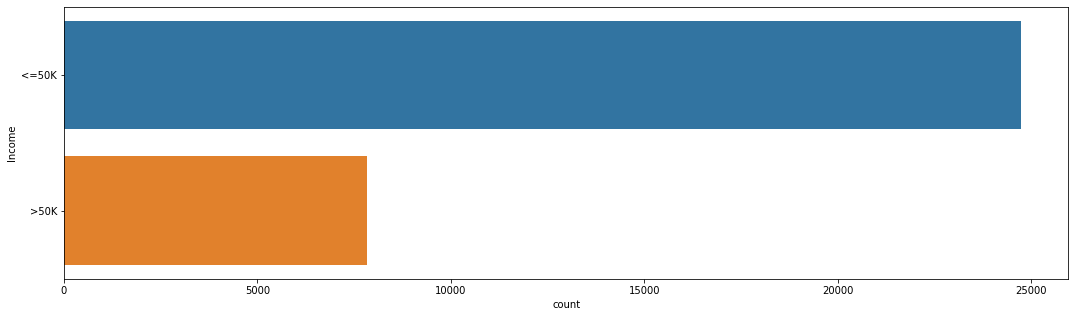

In [8]:
plt.figure(figsize=(18,5))
sns.countplot(y="Income", data=data)
plt.show()

In [9]:
plt.figure(figsize=(18,5))
sns.countplot(y="Income", data=test)
plt.show()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            32561 non-null  int64 
 1   WorkClass      32561 non-null  object
 2   fnlwgt         32561 non-null  int64 
 3   Education      32561 non-null  object
 4   EducationNum   32561 non-null  int64 
 5   MaritalStatus  32561 non-null  object
 6   Occupation     32561 non-null  object
 7   Relationship   32561 non-null  object
 8   Race           32561 non-null  object
 9   Gender         32561 non-null  object
 10  CapitalGain    32561 non-null  int64 
 11  CapitalLoss    32561 non-null  int64 
 12  HoursPerWeek   32561 non-null  int64 
 13  NativeCountry  32561 non-null  object
 14  Income         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### `Occupation`

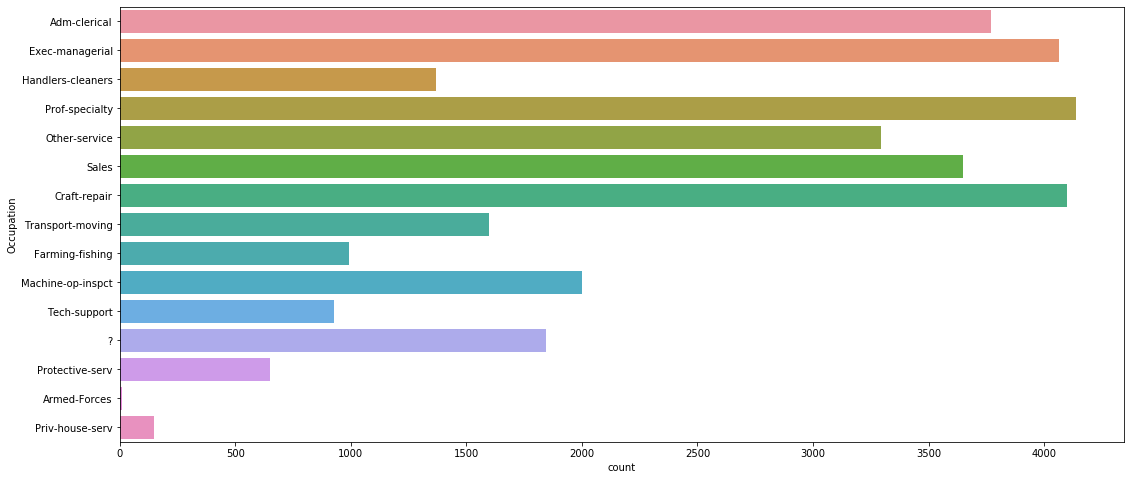

In [109]:
plt.figure(figsize=(18,8))
sns.countplot(y="Occupation", data=data)
plt.show()

In [110]:
# on garde '?' comme une nouvelle classe : 'unknown'
data['Occupation'] = pd.Series(['Unknown' if item == '?' else item for item in data["Occupation"]])

# 寻找相关列 (trouver les colonnes relatives)

### `EducationNum` & `Education`

In [111]:
pd.crosstab(data['EducationNum'],data['Education'])
# on constate que dans le table croisé, les colonnes EducationNum et Education sont identiques
# donc on peut supprimer la colonne Education, et la colonne EducationNum sert comme un variable quantitatif

Education     10th  11th  12th  1st-4th  5th-6th  7th-8th  9th  Assoc-acdm  \
EducationNum                                                                 
1                0     0     0        0        0        0    0           0   
2                0     0     0      168        0        0    0           0   
3                0     0     0        0      333        0    0           0   
4                0     0     0        0        0      646    0           0   
5                0     0     0        0        0        0  514           0   
6              933     0     0        0        0        0    0           0   
7                0  1175     0        0        0        0    0           0   
8                0     0   433        0        0        0    0           0   
9                0     0     0        0        0        0    0           0   
10               0     0     0        0        0        0    0           0   
11               0     0     0        0        0        0    0           0   
12               0     0     0        0        0        0    0        1067   
13               0     0     0        0        0        0    0           0   
14               0     0     0        0        0        0    0           0   
15               0     0     0        0        0        0    0           0   
16               0     0     0        0        0        0    0           0   

Education     Assoc-voc  Bachelors  Doctorate  HS-grad  Masters  Preschool  \
EducationNum                                                                 
1                     0          0          0        0        0         51   
2                     0          0          0        0        0          0   
3                     0          0          0        0        0          0   
4                     0          0          0        0        0          0   
5                     0          0          0        0        0          0   
6                     0          0          0        0        0          0   
7                     0          0          0        0        0          0   
8                     0          0          0        0        0          0   
9                     0          0          0    10501        0          0   
10                    0          0          0        0        0          0   
11                 1382          0          0        0        0          0   
12                    0          0          0        0        0          0   
13                    0       5355          0        0        0          0   
14                    0          0          0        0     1723          0   
15                    0          0          0        0        0          0   
16                    0          0        413        0        0          0   

Education     Prof-school  Some-college  
EducationNum                             
1                       0             0  
2                       0             0  
3                       0             0  
4                       0             0  
5                       0             0  
6                       0             0  
7                       0             0  
8                       0             0  
9                       0             0  
10                      0          7291  
11                      0             0  
12                      0             0  
13                      0             0  
14                      0             0  
15                    576             0  
16                      0             0

In [112]:
data = data.drop(['Education'], axis=1)

### `CapitalGain` & `CapitalLoss`

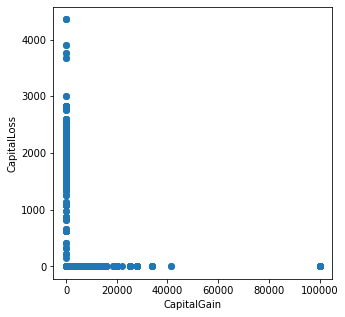

In [113]:
plt.figure(figsize=(5,5))
plt.scatter('CapitalGain','CapitalLoss', data= data)
plt.xlabel("CapitalGain")
plt.ylabel("CapitalLoss")
plt.show()
# la plupart de valeurs de CapitalGain et CapitalLoss sont 0
# If capital.gain is zero there is possibility of capital loss being high or above zero.
# If capital loss is zero there is possibility of capital.gain being high or above zero.

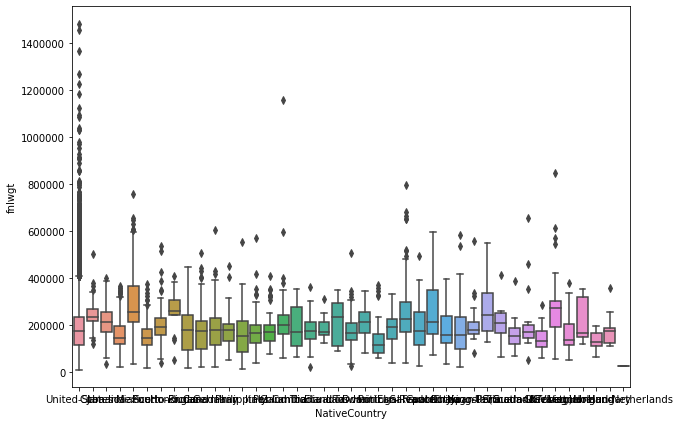

In [114]:
plt.figure(figsize=(10,7))
sns.boxplot(x='NativeCountry',y='fnlwgt',data=data)
plt.show()

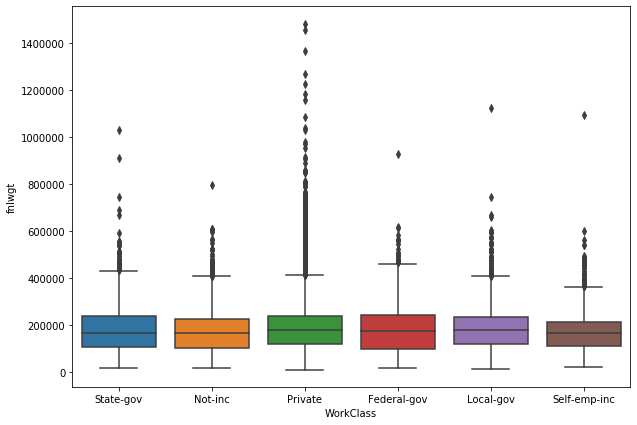

In [18]:
plt.figure(figsize=(10,7))
sns.boxplot(x='WorkClass',y='fnlwgt',data=data)
plt.show()

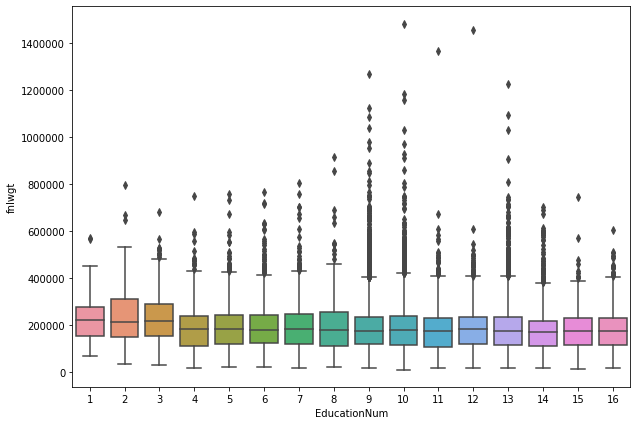

In [19]:
plt.figure(figsize=(10,7))
sns.boxplot(x='EducationNum',y='fnlwgt',data=data)
plt.show()

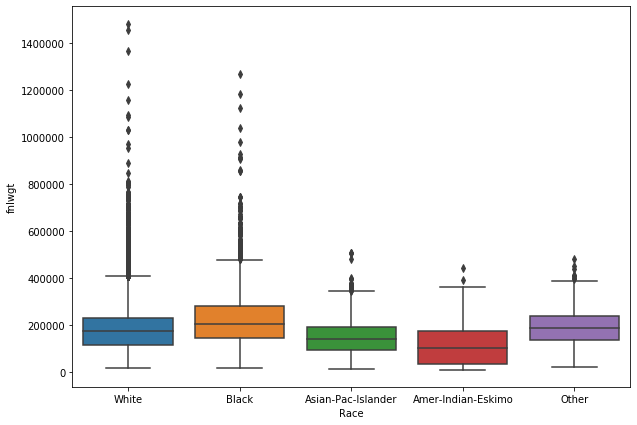

In [20]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Race',y='fnlwgt',data=data)
plt.show()

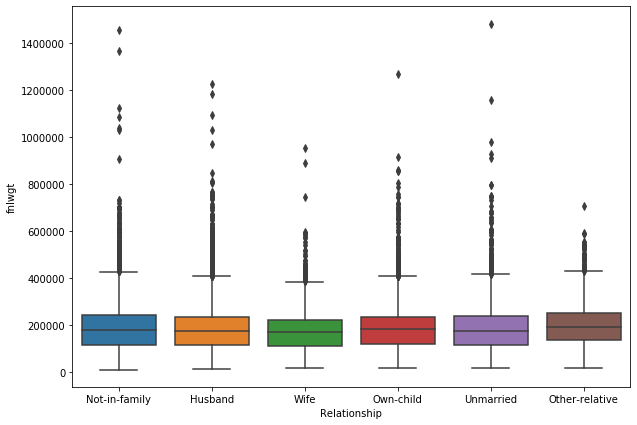

In [21]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Relationship',y='fnlwgt',data=data)
plt.show()

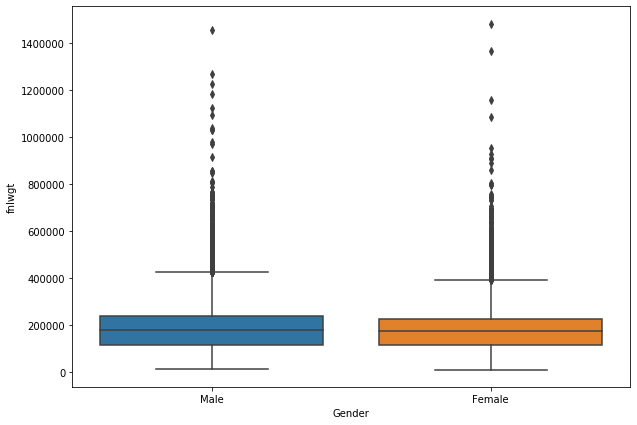

In [22]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Gender',y='fnlwgt',data=data)
plt.show()

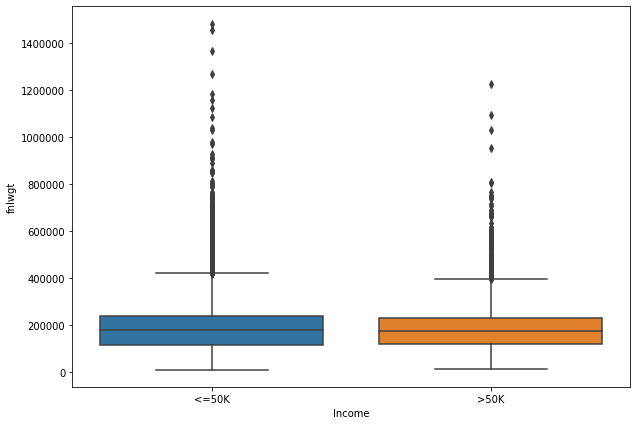

In [23]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Income',y='fnlwgt',data=data)
plt.show()

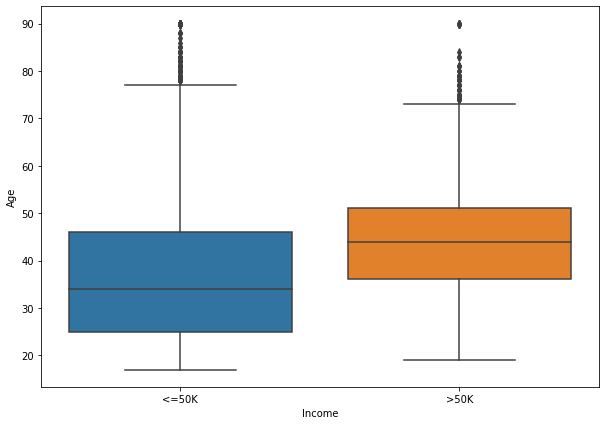

In [24]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Income',y='Age',data=data)
plt.show()

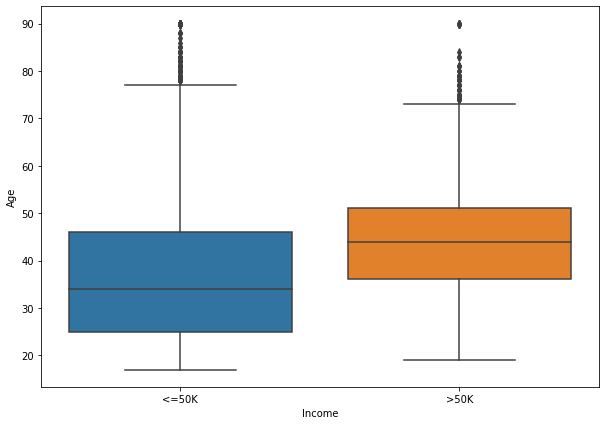

In [25]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Income',y='Age',data=data)
plt.show()

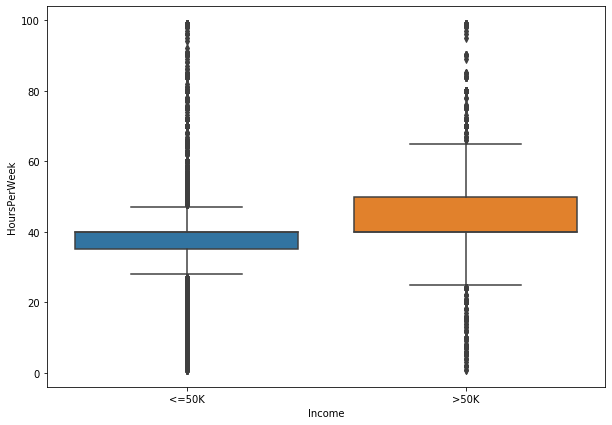

In [26]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Income',y='HoursPerWeek',data=data)
plt.show()

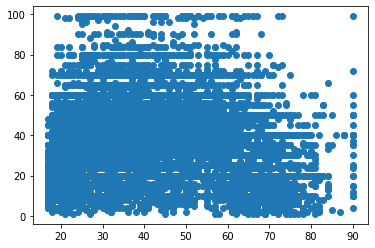

In [27]:
plt.scatter('Age','HoursPerWeek', data= data)

In [28]:
# on peut utiliser (CapitalGain - CapitalLoss) pour fusionner les informations de deux colonnes
data['CapitalChange'] = data['CapitalGain'] - data['CapitalLoss']
data = data.drop(['CapitalGain', 'CapitalLoss'], axis=1)


In [29]:
print(sum(data['CapitalChange']==0))
print(len(data))

28330
32561


### `MaritalStatus` & `Relationship` & `Gender`

In [115]:
pd.crosstab(data['MaritalStatus'],data['Relationship'], margins=True)

Relationship           Husband  Not-in-family  Other-relative  Own-child  \
MaritalStatus                                                              
Divorced                     0           2404             110        328   
Married-AF-spouse            9              0               1          1   
Married-civ-spouse       13184             17             124         95   
Married-spouse-absent        0            211              32         45   
Never-married                0           4706             611       4485   
Separated                    0            420              55         99   
Widowed                      0            547              48         15   
All                      13193           8305             981       5068   

Relationship           Unmarried  Wife    All  
MaritalStatus                                  
Divorced                    1601     0   4443  
Married-AF-spouse              0    12     23  
Married-civ-spouse             0  1556  14976  
Married-spouse-absent        130     0    418  
Never-married                881     0  10683  
Separated                    451     0   1025  
Widowed                      383     0    993  
All                         3446  1568  32561

In [116]:
pd.crosstab(data['MaritalStatus'],data['Relationship'], margins=True)

Relationship           Husband  Not-in-family  Other-relative  Own-child  \
MaritalStatus                                                              
Divorced                     0           2404             110        328   
Married-AF-spouse            9              0               1          1   
Married-civ-spouse       13184             17             124         95   
Married-spouse-absent        0            211              32         45   
Never-married                0           4706             611       4485   
Separated                    0            420              55         99   
Widowed                      0            547              48         15   
All                      13193           8305             981       5068   

Relationship           Unmarried  Wife    All  
MaritalStatus                                  
Divorced                    1601     0   4443  
Married-AF-spouse              0    12     23  
Married-civ-spouse             0  1556  14976  
Married-spouse-absent        130     0    418  
Never-married                881     0  10683  
Separated                    451     0   1025  
Widowed                      383     0    993  
All                         3446  1568  32561

In [32]:
# a mon avis, on peut inclure ces deux colonne comme deux colonnes (married ? 1:0, haveChild ? 1:0)
data['MaritalStatus'] = data["MaritalStatus"].map({ 
    "Divorced": 0, 
    "Married-AF-spouse": 1,
    "Married-civ-spouse": 1,
    "Married-spouse-absent": 0,
    "Never-married": 0,
    "Separated": 0,
    "Widowed": 0
})
data['HasChild'] = pd.Series([1 if item == 'Own-child' else 0 for item in data["Relationship"]])
data = data.drop(['Relationship'], axis=1)

# 将y转换成01变量 (remplacer la reponse par 0, 1 : classification binaire)

In [117]:
data.Income.value_counts()

<=50K    24720
>50K      7841
Name: Income, dtype: int64

In [118]:
data['Income'] = data["Income"].map({"<=50K": 0, ">50K": 1})

In [119]:
data

Age     WorkClass  fnlwgt  EducationNum  MaritalStatus  \
0       39     State-gov   77516            13              0   
1       50       Not-inc   83311            13              1   
2       38       Private  215646             9              0   
3       53       Private  234721             7              1   
4       28       Private  338409            13              1   
...    ...           ...     ...           ...            ...   
32556   27       Private  257302            12              1   
32557   40       Private  154374             9              1   
32558   58       Private  151910             9              0   
32559   22       Private  201490             9              0   
32560   52  Self-emp-inc  287927             9              1   

              Occupation   Race  Gender  HoursPerWeek  NativeCountry  Income  \
0           Adm-clerical  White    Male            40  United-States       0   
1        Exec-managerial  White    Male            13  United-States       0   
2      Handlers-cleaners  White    Male            40  United-States       0   
3      Handlers-cleaners  Black    Male            40  United-States       0   
4         Prof-specialty  Black  Female            40           Cuba       0   
...                  ...    ...     ...           ...            ...     ...   
32556       Tech-support  White  Female            38  United-States       0   
32557  Machine-op-inspct  White    Male            40  United-States       1   
32558       Adm-clerical  White  Female            40  United-States       0   
32559       Adm-clerical  White    Male            20  United-States       0   
32560    Exec-managerial  White  Female            40  United-States       1   

       CapitalChange  HasChild  
0               2174         0  
1                  0         0  
2                  0         0  
3                  0         0  
4                  0         0  
...              ...       ...  
32556              0         0  
32557              0         0  
32558              0         0  
32559              0         1  
32560          15024         0  

[32561 rows x 13 columns]

# ACP (not finished, bad performance)

In [120]:
data['Gender'] = data["Gender"].map({"Female": 0, "Male": 1})
fnlwgt = data['fnlwgt']
income = data['Income']
X = data.drop(['fnlwgt', 'Income'], axis=1)
df = pd.get_dummies(X, columns=["WorkClass", "Occupation", "Race", "NativeCountry"])

In [121]:
df.shape

(32561, 74)

In [122]:
# la colonne 'fnlwgt' est une pondération sur les individus comme Dp dans le poly
# je ne trouve pas la méthode en python pour calculer 'weighted observation pca'
# donc je l'ai fait en moi-meme
sumWgt = float(np.sum(fnlwgt))
Dp = np.diag(fnlwgt/sumWgt)

In [123]:
X = df.to_numpy()

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [160]:
V = X.T @ X

val_p, vect_p = linalg.eigh(V)

sorted_indices = np.argsort(-val_p)
val_p = val_p[sorted_indices]
vect_p = vect_p[:,sorted_indices]

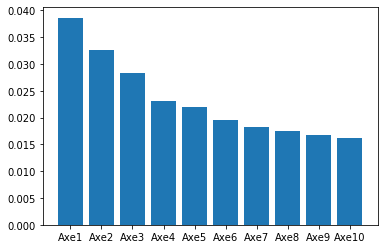

In [164]:
U = vect_p
sumVal = np.sum(val_p)
inertie_pourcentage = val_p / sumVal

plt.bar([f"Axe{i}" for i in range(1,11)],inertie_pourcentage[0:10])
plt.show()

In [165]:
inertie_pourcentage[0:10]

array([0.03861052, 0.03267318, 0.02833588, 0.02305296, 0.02192008,
       0.0195709 , 0.01820507, 0.01755758, 0.01665806, 0.01627625])

In [124]:
X.shape

(32561, 74)

[[-2.57765169e-01 -2.32333179e-01 -3.31487624e-01 ... -1.85604703e-01
   5.70039818e-02  5.45032715e-04]
 [ 1.34262808e-01  8.67413327e-02  1.46644169e-01 ... -4.29004538e-01
   1.37593214e-01  1.76380900e-02]
 [ 4.17273911e-02 -3.03322125e-01  2.21896460e-01 ... -2.80333332e-01
   1.54405339e-02  3.09754083e-02]
 ...
 [ 0.00000000e+00 -5.55111512e-17 -6.69932374e-17 ... -3.23489343e-02
  -5.22197796e-03 -2.55386640e-03]
 [ 3.59944323e-17  1.66143321e-16 -8.81009440e-18 ... -5.73171897e-01
  -9.25251814e-02 -4.52504690e-02]
 [-0.00000000e+00 -1.94289029e-16 -2.13659649e-16 ... -1.16027554e-01
  -1.87299317e-02 -9.16008143e-03]]
[2.85726636e+00 2.41788946e+00 2.09691933e+00 1.70597112e+00
 1.62213602e+00 1.44829105e+00 1.34721686e+00 1.29930053e+00
 1.23273462e+00 1.20447932e+00 1.17809807e+00 1.13332866e+00
 1.12519643e+00 1.11632760e+00 1.10858598e+00 1.08692747e+00
 1.07543993e+00 1.07216958e+00 1.06345559e+00 1.03887012e+00
 1.03234013e+00 1.02318593e+00 1.01598208e+00 1.00713869e+0

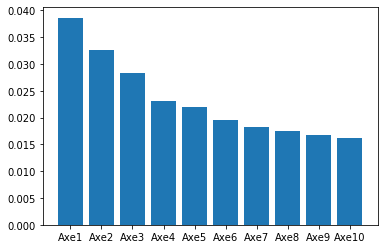

In [125]:
from sklearn.decomposition import PCA

cls = PCA(n_components=74)
cls.fit_transform(X)
print(cls.components_) #新的基
print(cls.explained_variance_) #inertie expliquée
print(cls.explained_variance_ratio_)

plt.bar([f"Axe{i}" for i in range(1,11)], cls.explained_variance_ratio_[0:10])
plt.show()

In [ ]:
data

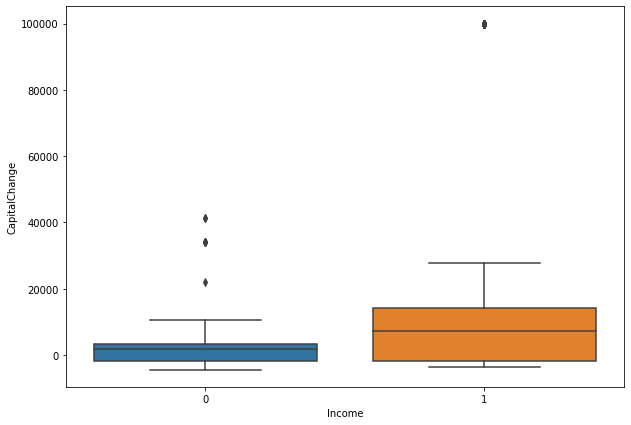

In [67]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Income", y='CapitalChange', data=data.loc[data['CapitalChange'] != 0])
plt.show()

In [74]:
c_t = pd.crosstab(data['WorkClass'],data['Occupation'],margins = False) 
c_t

Occupation           ?  Adm-clerical  Armed-Forces  Craft-repair  \
WorkClass                                                          
?                 1836             0             0             0   
Federal-gov          0           317             9            64   
Local-gov            0           283             0           146   
Never-worked         7             0             0             0   
Private              0          2833             0          3195   
Self-emp-inc         0            31             0           106   
Self-emp-not-inc     0            50             0           531   
State-gov            0           253             0            56   
Without-pay          0             3             0             1   

Occupation        Exec-managerial  Farming-fishing  Handlers-cleaners  \
WorkClass                                                               
?                               0                0                  0   
Federal-gov                   180                8                 23   
Local-gov                     214               29                 47   
Never-worked                    0                0                  0   
Private                      2691              455               1273   
Self-emp-inc                  400               51                  2   
Self-emp-not-inc              392              430                 15   
State-gov                     189               15                  9   
Without-pay                     0                6                  1   

Occupation        Machine-op-inspct  Other-service  Priv-house-serv  \
WorkClass                                                             
?                                 0              0                0   
Federal-gov                      14             35                0   
Local-gov                        12            193                0   
Never-worked                      0              0                0   
Private                        1913           2740              149   
Self-emp-inc                     13             27                0   
Self-emp-not-inc                 36            175                0   
State-gov                        13            124                0   
Without-pay                       1              1                0   

Occupation        Prof-specialty  Protective-serv  Sales  Tech-support  \
WorkClass                                                                
?                              0                0      0             0   
Federal-gov                  175               28     14            68   
Local-gov                    705              304      7            38   
Never-worked                   0                0      0             0   
Private                     2313              190   2942           736   
Self-emp-inc                 160                5    291             3   
Self-emp-not-inc             373                6    385            26   
State-gov                    414              116     11            57   
Without-pay                    0                0      0             0   

Occupation        Transport-moving  
WorkClass                           
?                                0  
Federal-gov                     25  
Local-gov                      115  
Never-worked                     0  
Private                       1266  
Self-emp-inc                    27  
Self-emp-not-inc               122  
State-gov                       41  
Without-pay                      1

# ACM

In [88]:
import prince
fnlwgt = data['fnlwgt']
income = data['Income']
X = data.drop(['fnlwgt', 'Income'], axis=1)
mca = prince.MCA(
    n_components=2, 
    n_iter=3, 
    copy=True, 
    check_input=True, 
    engine='auto',
    random_state=42
)

mca = mca.fit(X)
print(mca.transform(X))

              0         1
0     -0.308332  0.019398
1      1.190698 -3.282182
2      1.193196 -3.300329
3      1.192446 -3.297842
4      1.193720 -3.299418
...         ...       ...
32556  1.193814 -3.298945
32557  1.192776 -3.296444
32558  1.192475 -3.298335
32559  1.194129 -3.308219
32560 -0.364244  0.143001

[32561 rows x 2 columns]


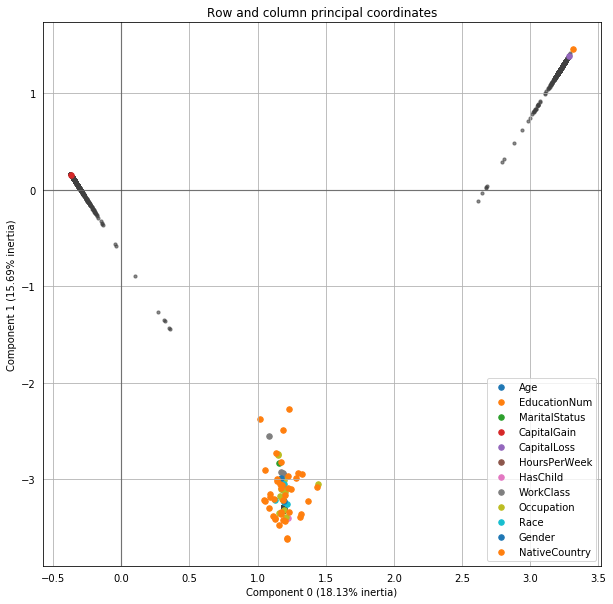

In [95]:
ax = mca.plot_coordinates(
    X=X,
    ax=None,
    figsize=(10, 10),
    show_row_points=True,
    row_points_size=10,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=False,
    legend_n_cols=1
)
plt.show()